In [185]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [186]:
df = pd.read_csv('./data/training_series.csv')
data = df['Close'].array

In [187]:
df

,Year,Month,Date,Open,High,Low,Close,Adj Close,Volume
0,2017,1,3,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017,1,4,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017,1,5,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017,1,6,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017,1,9,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...,...,...,...
1242,2021,12,8,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,3061550000
1243,2021,12,9,4691.000000,4695.259766,4665.979980,4667.450195,4667.450195,2851660000
1244,2021,12,10,4687.640137,4713.569824,4670.240234,4712.020020,4712.020020,2858310000
1245,2021,12,13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3322050000


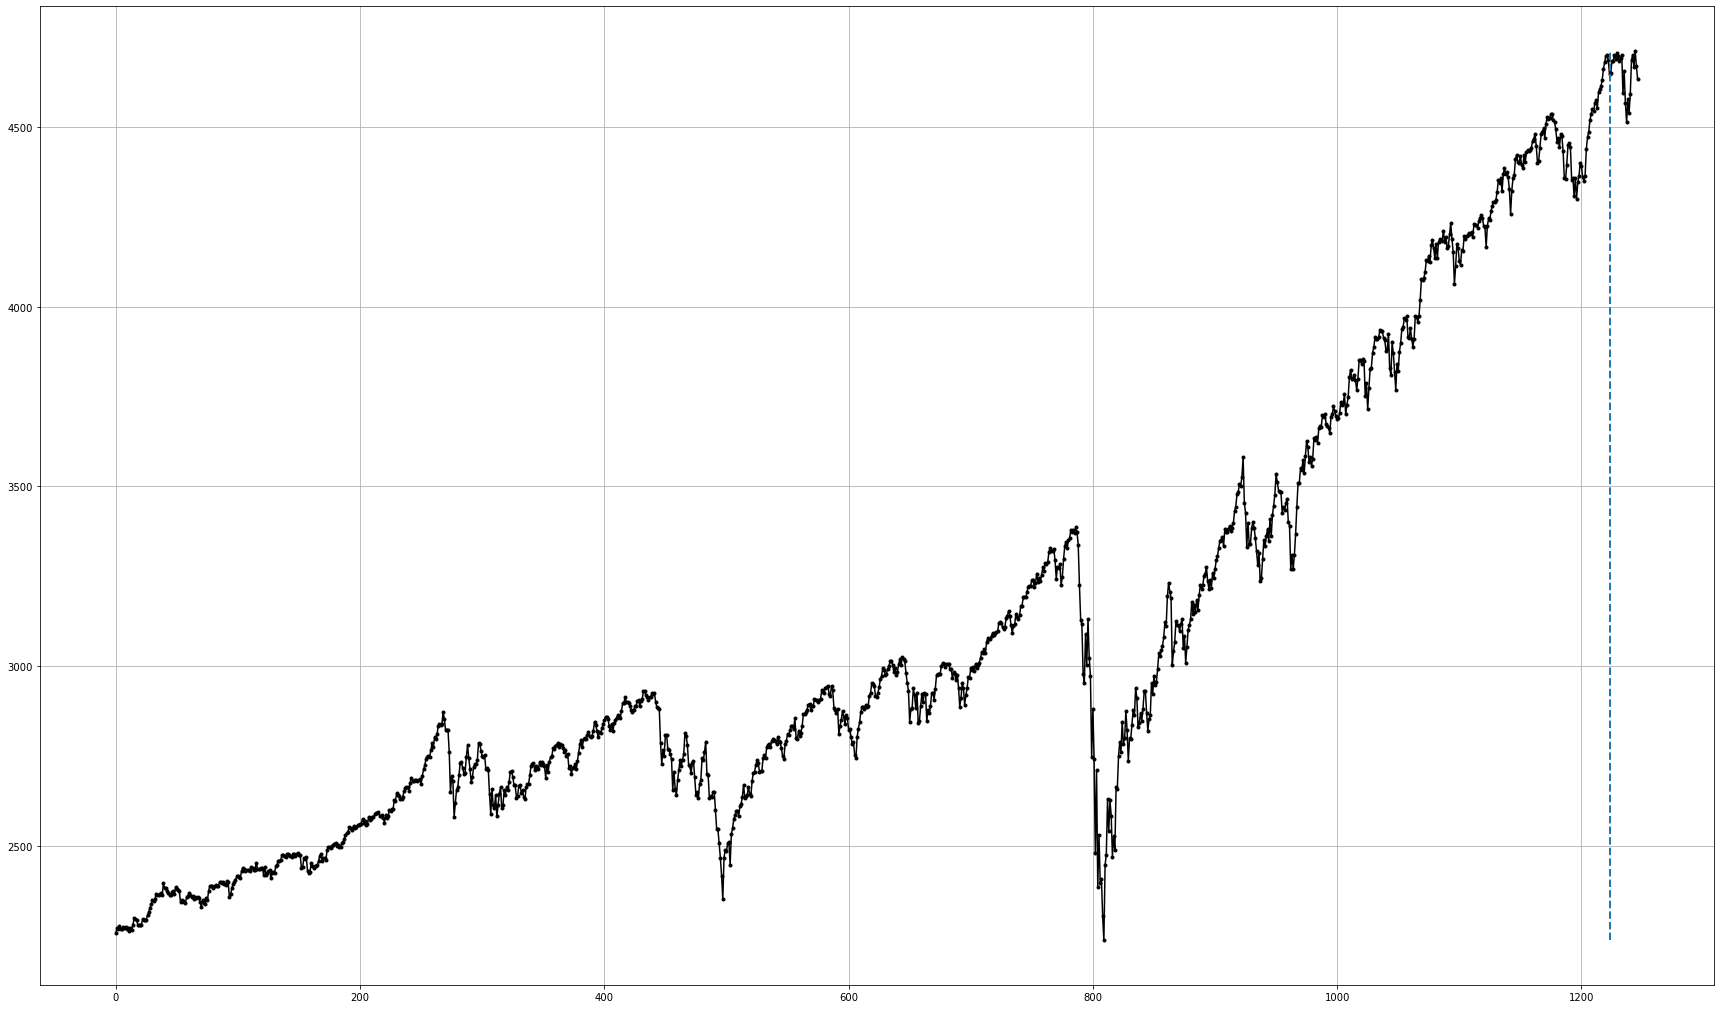

In [188]:
plt.figure(figsize=(30, 18))
plt.plot(data, ".-k")
plt.grid()

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot(
    [len(data) - 24, len(data) - 24],
    [min(data), max(data)],
    "--",
    linewidth=2);

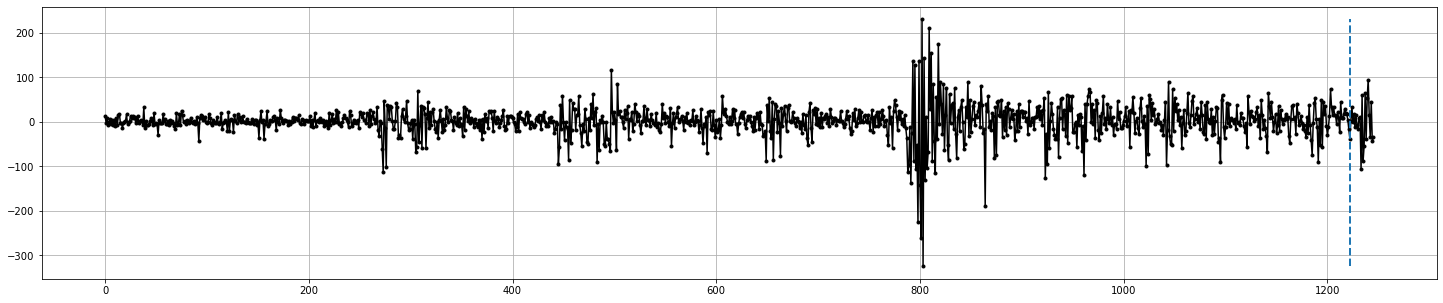

In [189]:
# Se remueve la tendencia
data_d1 = [data[t] - data[t - 1] for t in range(1, len(data))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(25, 5))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 24, len(data_d1) - 24],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

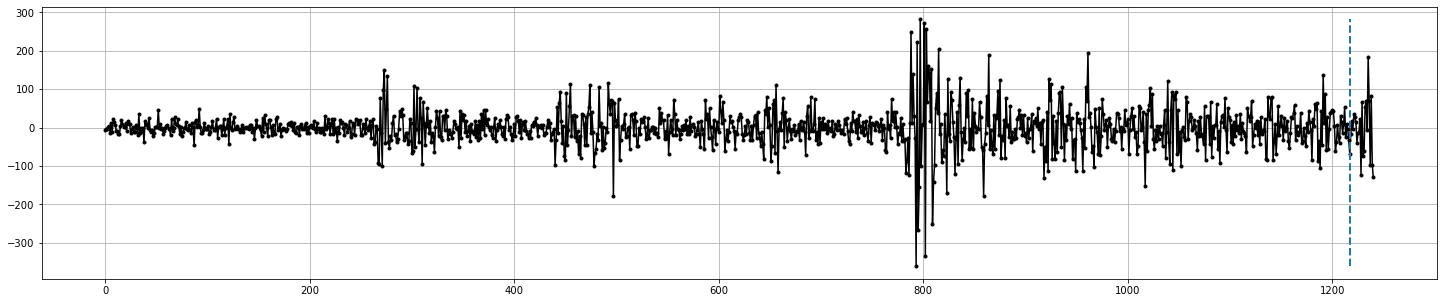

In [190]:
#
# Se remueve la componente cíclica
# restando z[t] - z[t-12]
#
data_d1d5 = [data_d1[t] - data_d1[t - 5] for t in range(5, len(data_d1))]

plt.figure(figsize=(25, 5))
plt.plot(data_d1d5, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5) - 24, len(data_d1d5) - 24],
    [min(data_d1d5), max(data_d1d5)],
    "--",
    linewidth=2,
);

In [191]:
#
# Se escalan los valores como en el caso anaterior
#
scaler = MinMaxScaler()
data_d1d5_scaled = scaler.fit_transform(np.array(data_d1d5).reshape(-1, 1))
data_d1d5_scaled = [u[0] for u in data_d1d5_scaled]

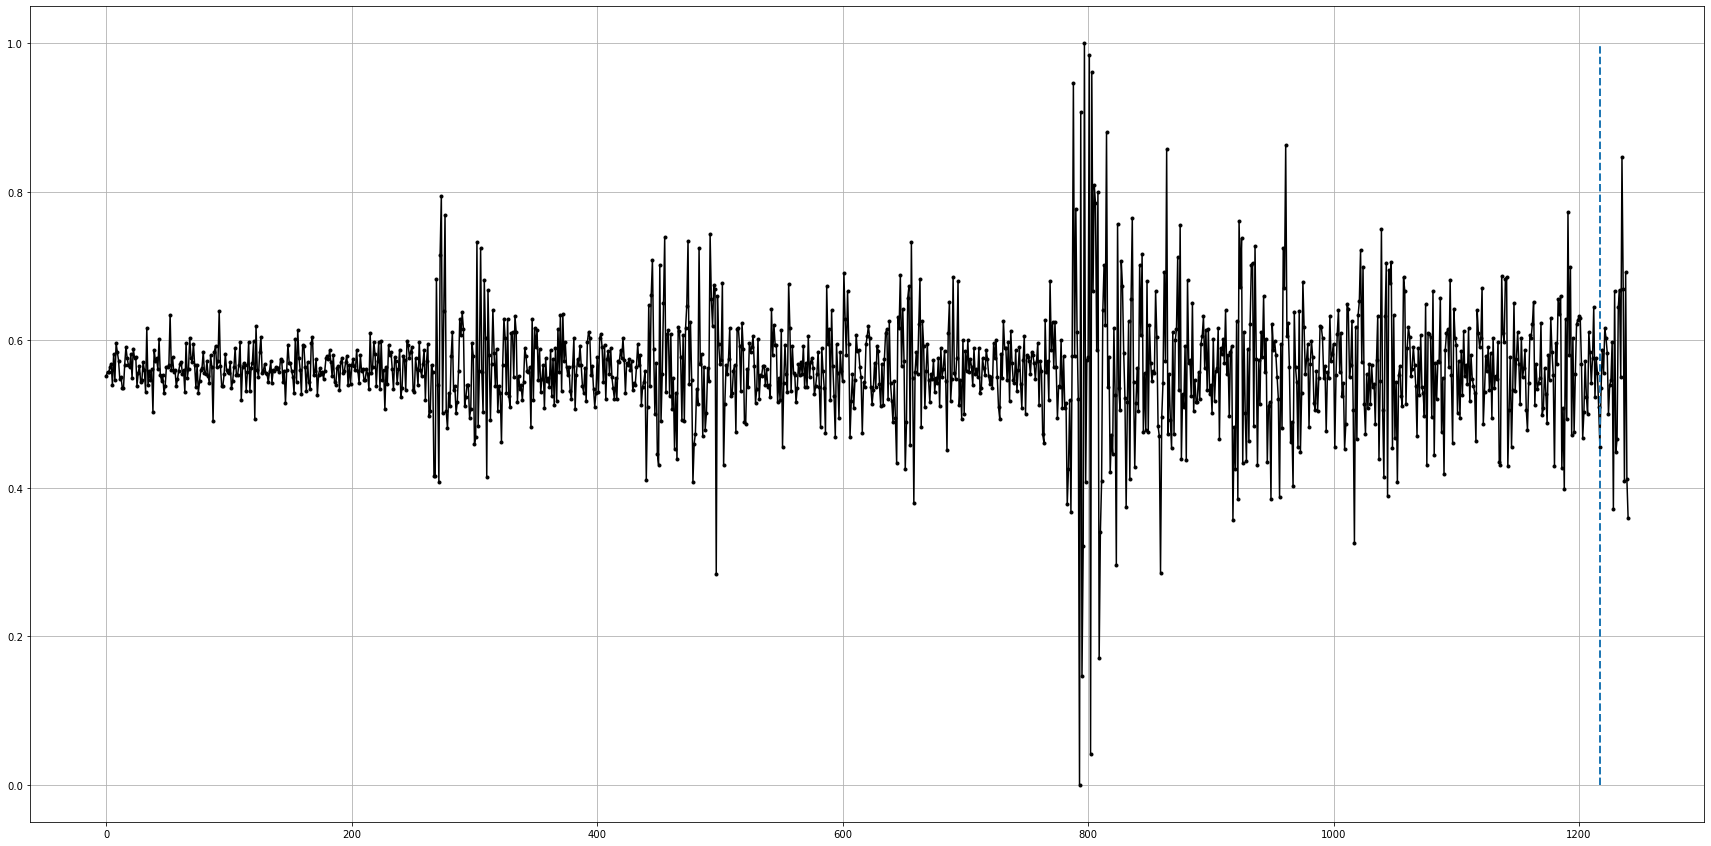

In [192]:
#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(30, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5_scaled) - 24, len(data_d1d5_scaled) - 24],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

In [193]:
#
# Se construye la matriz de regresores
#
P = 5

X = []
for t in range(P - 1, len(data_d1d5_scaled) - 1):
    X.append([data_d1d5_scaled[t - n] for n in range(P)])

d = data_d1d5_scaled[P:]

In [194]:
#
# Se construye la matriz de regresores
#
P = 5

Xt = []
for t in range(P - 1, len(data_d1d5_scaled) - 1):

    Xt.append([data_d1d5_scaled[t - n] for n in range(P)])


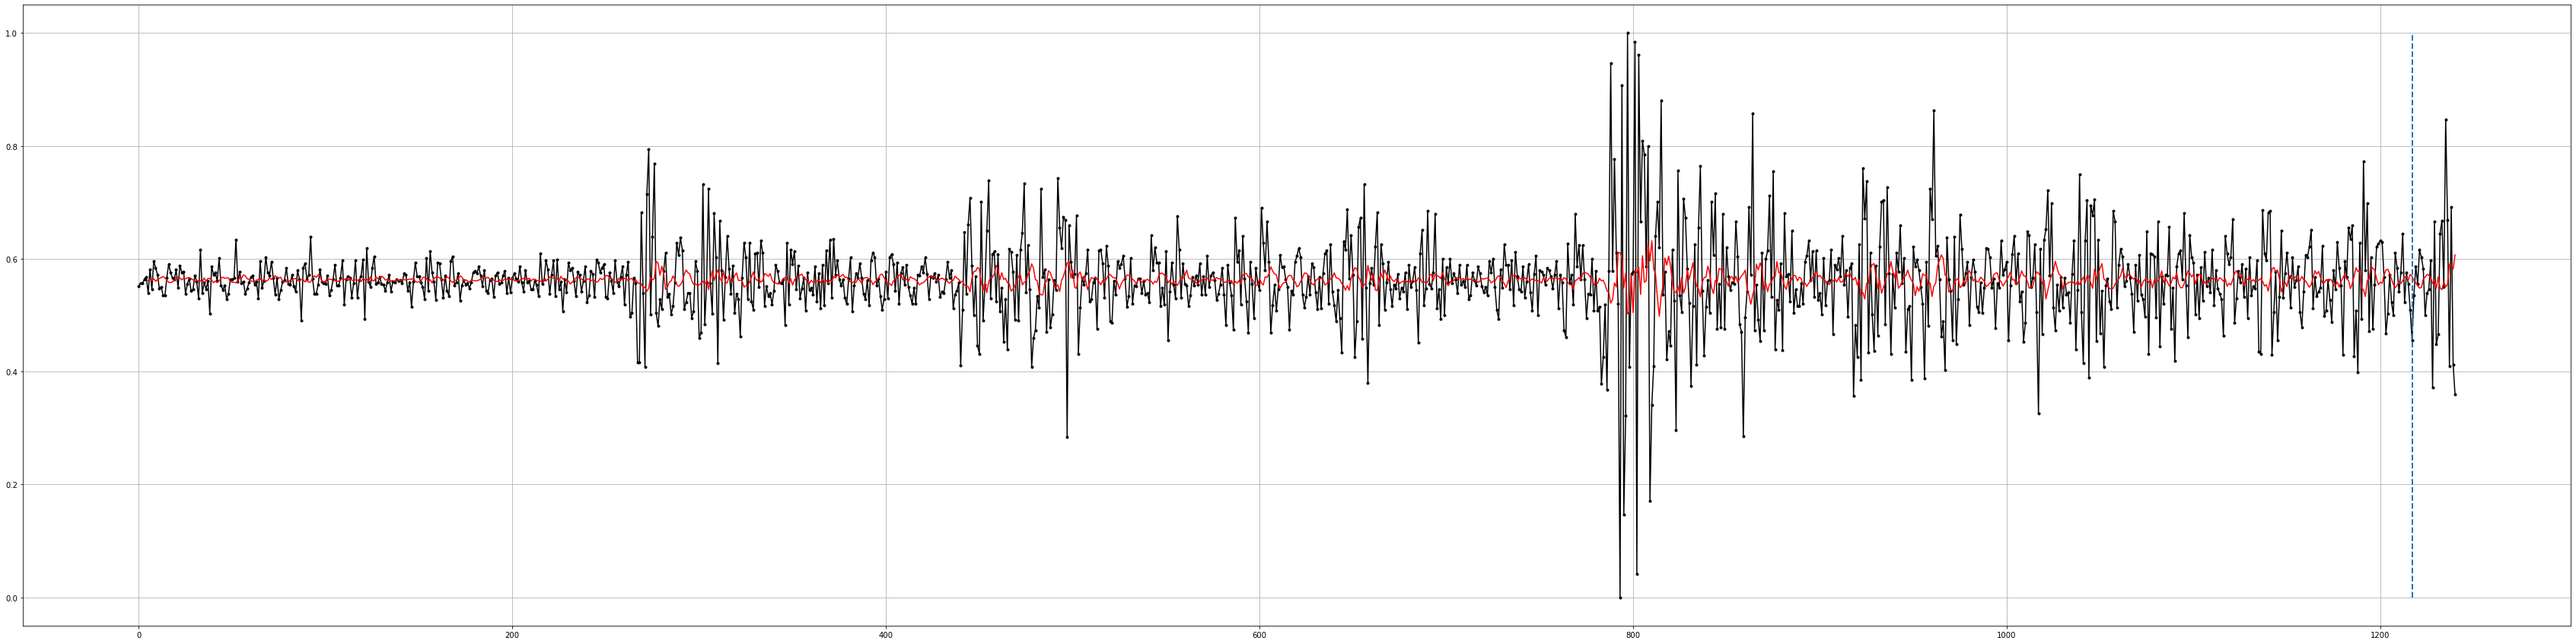

In [195]:
H = 5  # Se escoge arbitrariamente

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(H,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.002,
    max_iter=100000,
)

# Entrenamiento
mlp.fit(X[0:998], data_d1d5_scaled[0:998])

# Pronostico
y_d1d5_scaled_m2 = mlp.predict(X)

plt.figure(figsize=(60, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()

# No hay pronóstico para los primeros 5 valores de la serie
plt.plot([None] * P + y_d1d5_scaled_m2.tolist(), "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot(
    [len(data_d1d5_scaled) - 24, len(data_d1d5_scaled) - 24],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

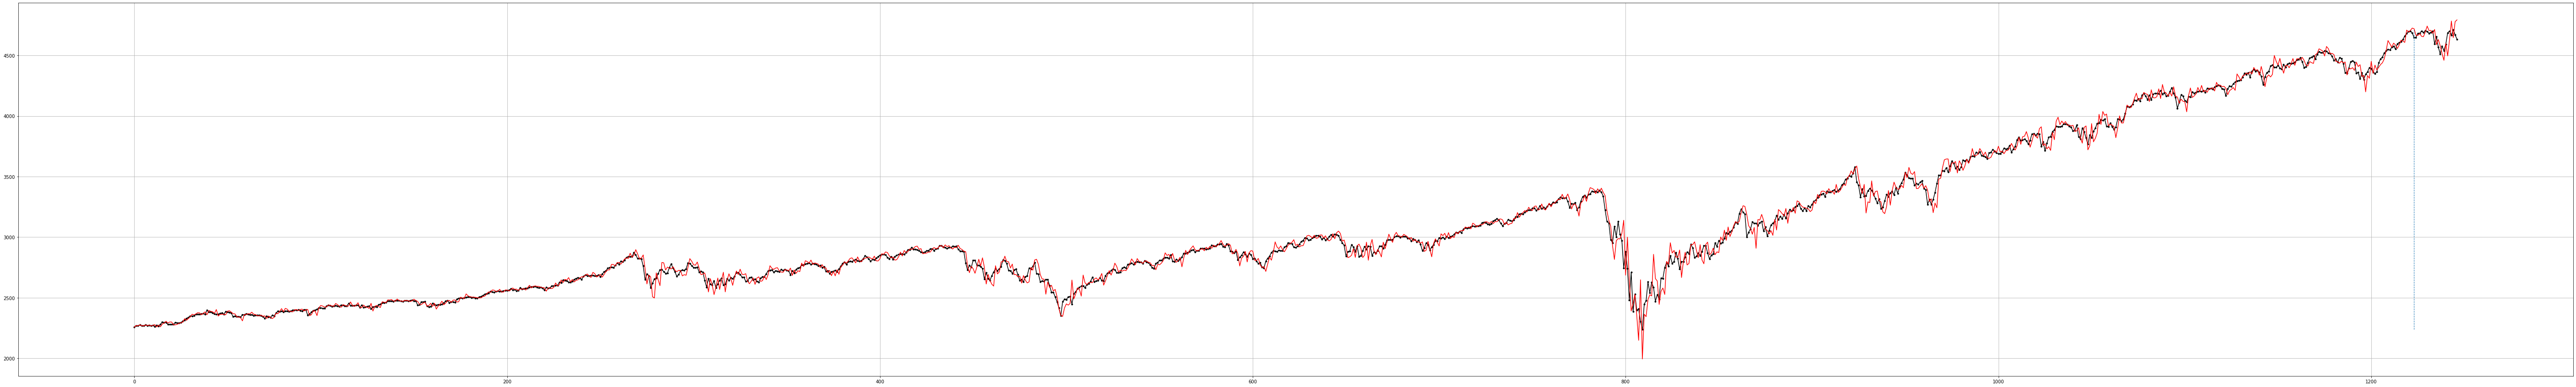

In [196]:
y_d1d5_scaled_m2 = data_d1d5_scaled[0:P] + y_d1d5_scaled_m2.tolist()

y_d1d5_m2 = scaler.inverse_transform([[u] for u in y_d1d5_scaled_m2])
y_d1d5_m2 = [u[0] for u in y_d1d5_m2.tolist()]

y_d1_m2 = [y_d1d5_m2[t] + data_d1[t] for t in range(len(y_d1d5_m2))]
y_d1_m2 = data_d1[0:5] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2
plt.figure(figsize=(100, 15))
plt.plot(data, ".-k")
plt.grid()

plt.plot(y_m2, "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data) - 24, len(data) - 24], [min(data), max(data)], "--", linewidth=1);

In [197]:
[u[0] for u in scaler.inverse_transform([[u] for u in y_d1d5_scaled_m2])]

[-6.4997558593750355,
 -3.130126953124991,
 -3.780029296875024,
 1.33007812499998,
 4.00000000000001,
 -0.3883603510276666,
 0.757984568321107,
 -0.4843603228589112,
 1.7490979978202417,
 -1.2165744697596212,
 0.8069098026656333,
 1.9203825800365508,
 2.9342984082429995,
 4.196501751468813,
 2.6681060746397534,
 -0.026127380152901312,
 -2.3480619053675666,
 -2.687825097167713,
 -2.007405713845329,
 0.20317129925718028,
 3.198248786559982,
 3.081615951315061,
 2.672559681151194,
 0.43049681995400874,
 2.245243799298042,
 1.557637739519415,
 2.856125008962043,
 2.940414708961631,
 1.8652021366389353,
 0.5230964634138703,
 -1.2781470043456644,
 -0.4924986414821324,
 -0.2707567403765314,
 -0.7042893676914576,
 -1.893249698947426,
 2.6113942813977524,
 -1.0851044821677593,
 2.0957523164117715,
 2.0114240683999496,
 -0.005919383571795262,
 -2.8199835302807084,
 -0.8947505355710256,
 -2.6749277526350195,
 -0.6336067544328978,
 2.2206306737188415,
 3.5249796966419753,
 2.2454383706143313,
 2.6

In [198]:
[data[0]] + [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

[2257.830078125,
 2270.75,
 2269.0,
 2276.97998046875,
 2268.89990234375,
 2268.89990234375,
 2275.320068359375,
 2270.43994140625,
 2274.639892578125,
 2267.889892578125,
 2271.889892578125,
 2277.9216982427224,
 2259.5677990214463,
 2275.0256494427663,
 2260.199049169695,
 2282.8534938896155,
 2290.977075818291,
 2306.2204314081614,
 2291.514132392618,
 2299.966521282719,
 2299.8382720902646,
 2277.833735901097,
 2276.5120455165074,
 2280.9420577153323,
 2288.5228677236546,
 2293.963181064882,
 2299.168219489685,
 2327.521557357565,
 2313.912794056151,
 2329.200516351204,
 2341.415165674298,
 2364.0078330520196,
 2358.306076180837,
 2366.2502291620867,
 2376.575163074139,
 2375.013086697789,
 2360.5018822925294,
 2370.787530655393,
 2383.6992139627487,
 2360.3757887573083,
 2395.0567014729277,
 2388.0613454532727,
 2384.444924814707,
 2371.2957034882866,
 2402.7213850058997,
 2348.934022022678,
 2363.2503289697192,
 2363.895288526929,
 2363.874876934865,
 2359.406432308067,
 2389.370

In [199]:
y_m2

[2257.830078125,
 2270.75,
 2269.0,
 2276.97998046875,
 2268.89990234375,
 2268.89990234375,
 2275.320068359375,
 2270.43994140625,
 2274.639892578125,
 2267.889892578125,
 2271.889892578125,
 2277.9216982427224,
 2259.5677990214463,
 2275.0256494427663,
 2260.199049169695,
 2282.8534938896155,
 2290.977075818291,
 2306.2204314081614,
 2291.514132392618,
 2299.966521282719,
 2299.8382720902646,
 2277.833735901097,
 2276.5120455165074,
 2280.9420577153323,
 2288.5228677236546,
 2293.963181064882,
 2299.168219489685,
 2327.521557357565,
 2313.912794056151,
 2329.200516351204,
 2341.415165674298,
 2364.0078330520196,
 2358.306076180837,
 2366.2502291620867,
 2376.575163074139,
 2375.013086697789,
 2360.5018822925294,
 2370.787530655393,
 2383.6992139627487,
 2360.3757887573083,
 2395.0567014729277,
 2388.0613454532727,
 2384.444924814707,
 2371.2957034882866,
 2402.7213850058997,
 2348.934022022678,
 2363.2503289697192,
 2363.895288526929,
 2363.874876934865,
 2359.406432308067,
 2389.370